<a href="https://colab.research.google.com/github/Confidentrf/DeepLearning/blob/modules/realworldpredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import random

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
# Load The dataset
X = pd.read_csv('HCV_feats.csv')
y = pd.read_csv('HCV_target.csv')

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1])
print("Possible Output Classes = ", y['AdvancedFibrosis'].unique())

Number of Examples in the Dataset =  1385
Number of Features for each example =  28
Possible Output Classes =  [0 1]


In [4]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Print the information regarding dataset sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print ("Number of examples in training set = ", X_train.shape[0])
print ("Number of examples in test set = ", X_test.shape[0])

(1108, 28)
(1108, 1)
(277, 28)
(277, 1)
Number of examples in training set =  1108
Number of examples in test set =  277


In [5]:
np.random.seed(seed)
random.set_seed(seed)
# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 3, activation = 'tanh', input_dim=X_train.shape[1]))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              87 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# train the model while storing all loss values
history=classifier.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_split=0.1, shuffle=False)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4952 - loss: 0.7652 - val_accuracy: 0.5405 - val_loss: 0.7238
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5055 - loss: 0.7527 - val_accuracy: 0.5405 - val_loss: 0.7173
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5059 - loss: 0.7426 - val_accuracy: 0.5315 - val_loss: 0.7121
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5071 - loss: 0.7343 - val_accuracy: 0.5405 - val_loss: 0.7078
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5100 - loss: 0.7275 - val_accuracy: 0.5586 - val_loss: 0.7044
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.7219 - val_accuracy: 0.5766 - val_loss: 0.7015
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 0.7172 - val_accuracy: 0.5766 - val_loss: 0.6992
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5169 - loss: 0.7133 - val_accuracy: 0.5676 - v

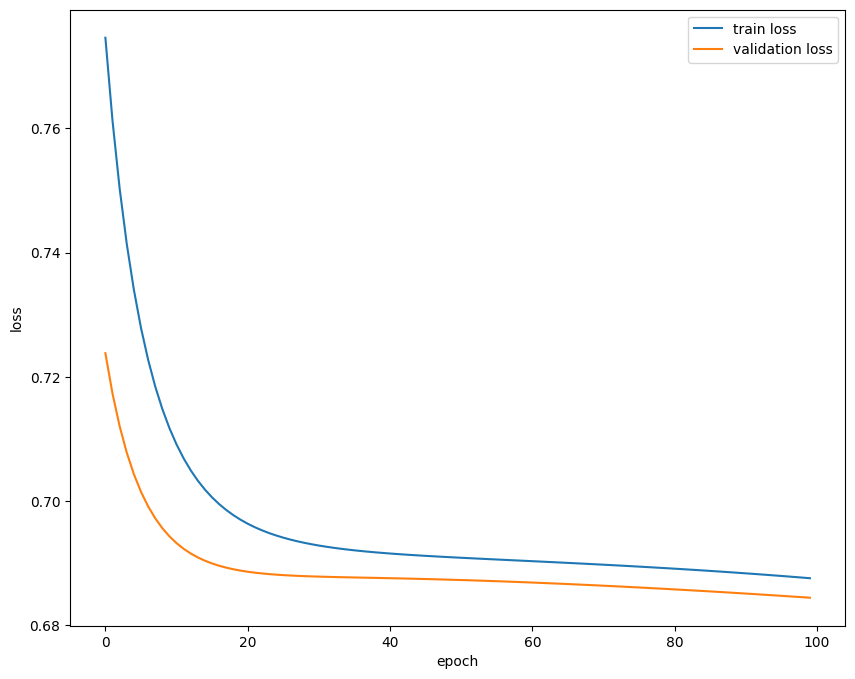

In [7]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# plot training error and test error plots
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [8]:
# print the best accuracy reached on training set and the test set
print(f"Best Accuracy on training set = {max(history.history['accuracy'])*100:.3f}%")
print(f"Best Accuracy on validation set = {max(history.history['val_accuracy'])*100:.3f}%")

test_loss, test_acc = classifier.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

Best Accuracy on training set = 54.263%
Best Accuracy on validation set = 57.658%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5262 - loss: 0.6879 
The loss on the test set is 0.6870 and the accuracy is 53.791%


In [9]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
random.set_seed(seed)
# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 4, activation = 'tanh', input_dim = X_train.shape[1]))
classifier.add(Dense(units = 2, activation = 'tanh'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │             116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# train the model while storing all loss values
history=classifier.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_split=0.1, shuffle=False)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4884 - loss: 0.7840 - val_accuracy: 0.5225 - val_loss: 0.7546
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4905 - loss: 0.7677 - val_accuracy: 0.5225 - val_loss: 0.7427
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 0.7545 - val_accuracy: 0.5135 - val_loss: 0.7334
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 0.7438 - val_accuracy: 0.5135 - val_loss: 0.7258
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5090 - loss: 0.7351 - val_accuracy: 0.5135 - val_loss: 0.7198
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5035 - loss: 0.7279 - val_accuracy: 0.5135 - val_loss: 0.7149
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5030 - loss: 0.7220 - val_accuracy: 0.5135 - val_loss: 0.7109
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5071 - loss: 0.7171 - val_accuracy: 0.5135 - v

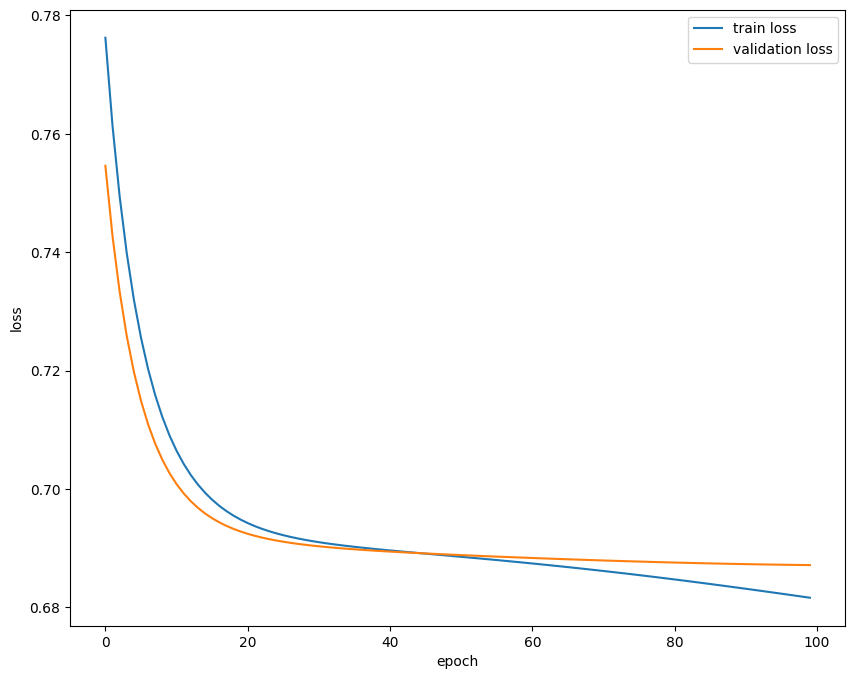

In [11]:
# plot training error and test error plots
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [12]:
# print the best accuracy reached on training set and the test set
print(f"Best Accuracy on training set = {max(history.history['accuracy'])*100:.3f}%")
print(f"Best Accuracy on test set = {max(history.history['val_accuracy'])*100:.3f}%")

test_loss, test_acc = classifier.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

Best Accuracy on training set = 56.369%
Best Accuracy on test set = 54.955%
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 0.7010 
The loss on the test set is 0.7014 and the accuracy is 50.903%
